<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

## Import libraries

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset and EDA and visualization

In [76]:
df = pd.read_csv('Exercise/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [77]:
# see the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [78]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [79]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above groupby.mean we can say that the
1. Satifaction level is low for who left 
2. working hours are high for left
3. poromtion rate is less compared to the nonleft

In fist look therse are the main factors for leaving the company

#### Now we want to know that is there any relation with department

draw the count plot of departmetn vs left

In [80]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

/opt/anaconda3/envs/jenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='count'>

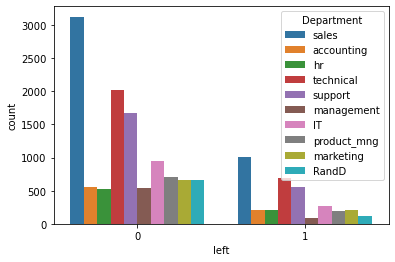

In [81]:
sns.countplot(df.left,data=df,hue=df.Department)

#### The both side 0 and 1 looks similar, ie, sales department has more employee. In first look we can't get any very relation between left and department. So we ignore it

But looking the below graph. May som relation with sales department

In [82]:
pd.crosstab(df.Department,df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:xlabel='Department'>

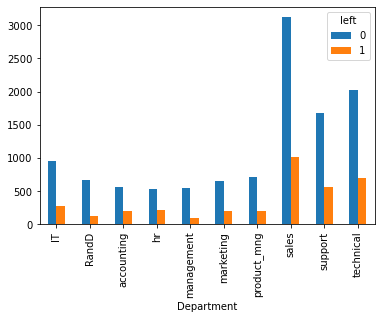

In [83]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

#### Looking for relation with Salary

In [84]:
# frequency table or contigency table
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

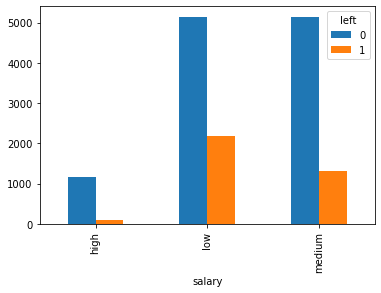

In [85]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

From above grapht we can see that more left of low salary side

### Conclusion

We will select the following features for the modelling

1. satisfaction_level
2. average_montly_hours
3. promotion_last_5years
4. salary

## Modelling

#### Creating subset of featuresaverage_montly_hours

In [86]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [87]:
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


#### label encoding of the salary column and setting predictor X and outcome y

In [88]:
X = pd.get_dummies(subdf,drop_first=True)
y = df.left

#### Split the dataset into test and train data

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

#### Model: LogisticRegression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model = LogisticRegression()

#### Fit X_train and y_train into the model

In [92]:
model.fit(X_train,y_train)

LogisticRegression()

In [93]:
# coefficents
model.coef_

array([[-3.79218220e+00,  2.17546059e-03, -1.13623726e+00,
         1.76011675e+00,  1.29706559e+00]])

In [94]:
# intercept
model.intercept_

array([-0.92413382])

## Models Evaluation using test dataset

### Error Metrics:
These are some frequently used metrics in industry for classification problems to measure accuracy percentages and error levels they are as follows:

1. Confusion Matrix, 
2. Classification Report, 3
3. ROC Curve & 
4. Accuracy Score

model.score() will give accuracy 

But we need precision, recall, f1, others

In [95]:
# Accuracy
model.score(X_test,y_test)

0.7791111111111111

### Confusion matrix

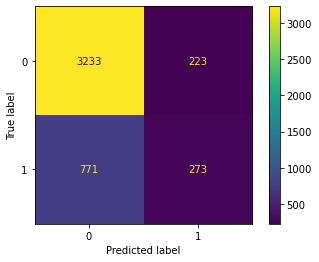

In [96]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred,labels=model.classes_)
cmdisp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
cmdisp.plot()
plt.show()

## Roc curve

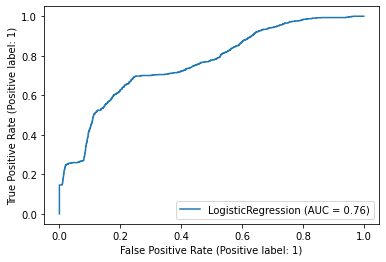

In [97]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)

## Classification report

To see all the metrics in a table

In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['Stay-0','Left-1']))

              precision    recall  f1-score   support

      Stay-0       0.81      0.94      0.87      3456
      Left-1       0.55      0.26      0.35      1044

    accuracy                           0.78      4500
   macro avg       0.68      0.60      0.61      4500
weighted avg       0.75      0.78      0.75      4500



## Conclusion

Logistic model fit perfectly and we get .768 scoreplot

# Other EDA

<AxesSubplot:>

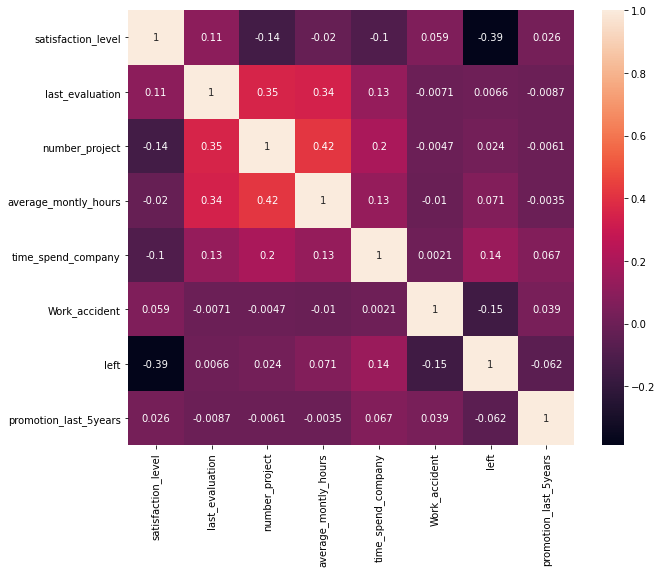

In [99]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True)

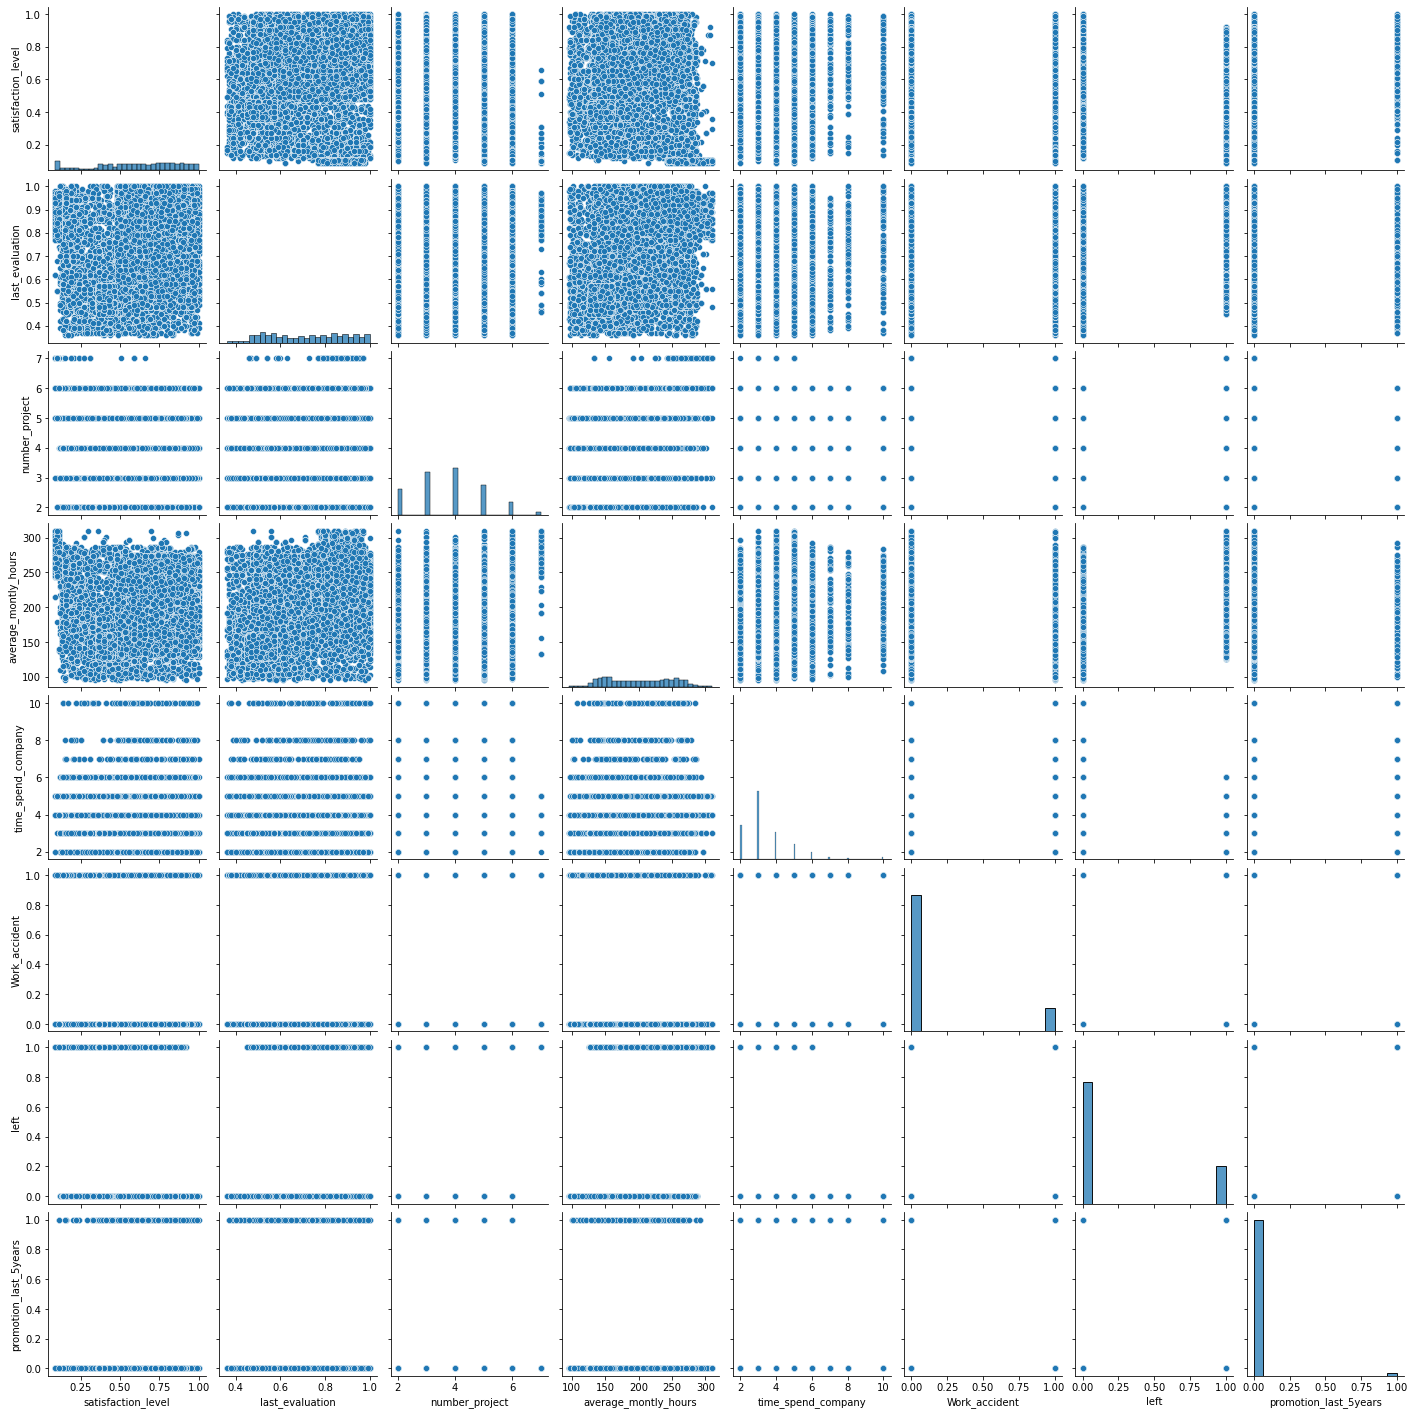

In [100]:
sns.pairplot(df)

### Conclusion 

I was thinking that I will get some relation between predictor and outcome if I draw corr() and pairplot
But I did't get anything from the above two grapht. 
And there is no multicollinearity between independent varibales

# Microsoft FLAML

In [107]:
from flaml.automl import AutoML
fl_auto_model = AutoML()